# Analiza mocy testu

1. Stw√≥rz krzywƒÖ mocy testu dla testu jednej ≈õredniej.
2. Okre≈õl kluczowe parametry wej≈õciowe, takie jak odchylenie standardowe populacji (œÉ), poziom istotno≈õci (Œ±) oraz wielko≈õƒá efektu (Œî).

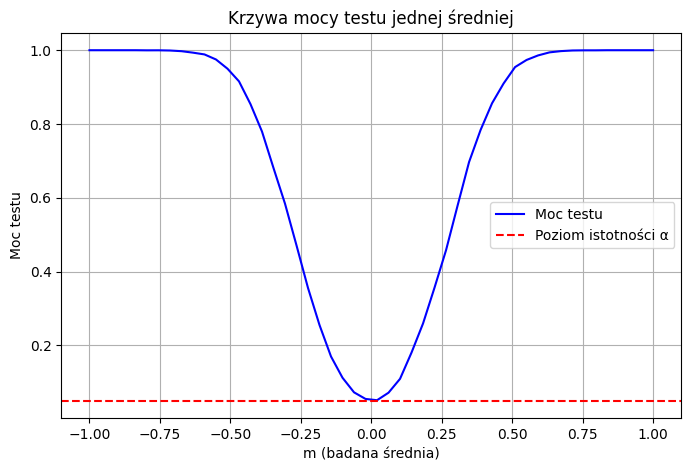

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametry
alpha = 0.05  # Poziom istotno≈õci
sigma = 1  # Odchylenie standardowe
n = 50  # Wielko≈õƒá pr√≥by
mu_0 = 0  # ≈örednia w H0
k = 10000  # Liczba symulacji

# Warto≈õci m dla testu
m_values = np.linspace(-1, 1, 50)

# Krytyczna warto≈õƒá Z dla testu dwustronnego
z_critical = norm.ppf(1 - alpha / 2)
critical_value = z_critical * (sigma / np.sqrt(n))

# Obliczanie mocy testu
power = []
for mu in m_values:
    # Pr√≥bki (k pr√≥bek o n obserwacjach)
    samples = np.random.normal(mu, sigma, (k, n))
    sample_means = np.mean(samples, axis=1)
    
    # Obliczamy statystykƒô testowƒÖ Z
    z_scores = (sample_means - mu_0) / (sigma / np.sqrt(n))
    
    # Sprawdzamy odrzucenie H0 (dwustronne)
    rejections = (np.abs(z_scores) > z_critical)
    power.append(np.mean(rejections))

plt.figure(figsize=(8, 5))
plt.plot(m_values, power, label="Moc testu", color="b")
plt.axhline(y=alpha, color="r", linestyle="--", label="Poziom istotno≈õci Œ±")
plt.xlabel("m (badana ≈õrednia)")
plt.ylabel("Moc testu")
plt.title("Krzywa mocy testu jednej ≈õredniej")
plt.legend()
plt.grid()
plt.show()


# Wp≈Çyw poziomu istotno≈õci (Œ±)

1. Przeanalizuj, jak zmienia siƒô krzywa mocy testu dla r√≥≈ºnych warto≈õci Œ± (np. 0.01, 0.05, 0.1).

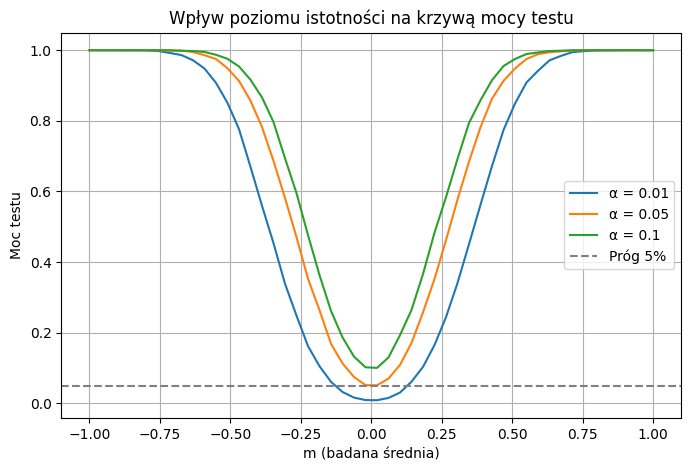

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametry
sigma = 1  # Odchylenie standardowe
n = 50  # Wielko≈õƒá pr√≥by
mu_0 = 0  # ≈örednia w hipotezie zerowej
k = 10000  # Liczba iteracji
alpha_values = [0.01, 0.05, 0.1]  # R√≥≈ºne poziomy istotno≈õci
m_values = np.linspace(-1, 1, 50)  # Zakres badanej ≈õredniej

# Obliczanie mocy testu dla r√≥≈ºnych warto≈õci alfa
plt.figure(figsize=(8, 5))

for alpha in alpha_values:
    z_critical = norm.ppf(1 - alpha / 2)  # Krytyczna warto≈õƒá Z dla testu dwustronnego
    critical_value = z_critical * (sigma / np.sqrt(n))  # Granica odrzucenia H0
    
    power = []
    for mu in m_values:
        samples = np.random.normal(mu, sigma, (k, n))  # Generowanie pr√≥bek
        sample_means = np.mean(samples, axis=1)
        
        z_scores = (sample_means - mu_0) / (sigma / np.sqrt(n))  # Obliczanie statystyki Z
        rejections = (np.abs(z_scores) > z_critical)  # Odrzucenie H0
        power.append(np.mean(rejections))
    
    plt.plot(m_values, power, label=f"Œ± = {alpha}")

plt.axhline(y=0.05, color="gray", linestyle="--", label="Pr√≥g 5%")
plt.xlabel("m (badana ≈õrednia)")
plt.ylabel("Moc testu")
plt.title("Wp≈Çyw poziomu istotno≈õci na krzywƒÖ mocy testu")
plt.legend()
plt.grid()
plt.show()


2. Zinterpretuj wyniki ‚Äì jak poziom istotno≈õci wp≈Çywa na zdolno≈õƒá testu do wykrycia rzeczywistego efektu?

**Interpretacja wynik√≥w**

Ni≈ºsze ùõº (np. 0.01)
Gdy krzywa mocy jest ni≈ºsza to test trudniej wykrywa rzeczywisty efekt.
Test jest bardziej rygorystyczny, co zmniejsza liczbƒô b≈Çƒôd√≥w I rodzaju (fa≈Çszywych odrzuce≈Ñ ùêª0), ale zwiƒôksza b≈Çƒôdy II rodzaju (nie wykrywanie prawdziwego efektu).

Wy≈ºsze ùõº (np. 0.1)
Krzywa mocy jest wy≈ºsza ‚Äì test ≈Çatwiej odrzuca ùêª0, co oznacza wiƒôkszƒÖ zdolno≈õƒá do wykrycia rzeczywistego efektu. Jednak zwiƒôksza siƒô ryzyko b≈Çƒôdu I rodzaju, czyli czƒô≈õciej odrzucamy ùêª0, nawet je≈õli jest prawdziwa.

# Wp≈Çyw liczebno≈õci pr√≥by (n)

1. Zmodyfikuj analizƒô, badajƒÖc r√≥≈ºne wielko≈õci pr√≥by.

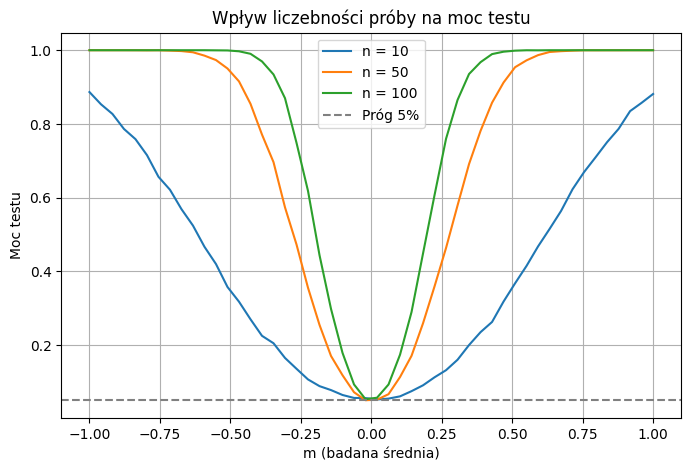

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametry
alpha = 0.05  # Poziom istotno≈õci
sigma = 1  # Odchylenie standardowe
mu_0 = 0  # ≈örednia w hipotezie zerowej
k = 10000  # Liczba iteracji
n_values = [10, 50, 100]  # R√≥≈ºne wielko≈õci pr√≥by
m_values = np.linspace(-1, 1, 50)  # Zakres badanej ≈õredniej

# Wykres
plt.figure(figsize=(8, 5))

for n in n_values:
    z_critical = norm.ppf(1 - alpha / 2)  # Krytyczna warto≈õƒá Z dla testu dwustronnego
    critical_value = z_critical * (sigma / np.sqrt(n))  # Granica odrzucenia H0
    
    power = []
    for mu in m_values:
        samples = np.random.normal(mu, sigma, (k, n))  # Generowanie pr√≥bek
        sample_means = np.mean(samples, axis=1)
        
        z_scores = (sample_means - mu_0) / (sigma / np.sqrt(n))  # Obliczanie statystyki Z
        rejections = (np.abs(z_scores) > z_critical)  # Odrzucenie H0
        power.append(np.mean(rejections))
    
    plt.plot(m_values, power, label=f"n = {n}")

plt.axhline(y=alpha, color="gray", linestyle="--", label="Pr√≥g 5%")
plt.xlabel("m (badana ≈õrednia)")
plt.ylabel("Moc testu")
plt.title("Wp≈Çyw liczebno≈õci pr√≥by na moc testu")
plt.legend()
plt.grid()
plt.show()


2. Zbadaj, jak wzrost lub spadek n wp≈Çywa na moc testu.

**Interpretacja wynik√≥w**

Ma≈Çe ùëõ (np. 10)
Krzywa mocy ro≈õnie powoli. Potrzeba wiƒôkszych efekt√≥w (ùëö) do wykrycia r√≥≈ºnicy.

≈örednie ùëõ (np. 50)
Test wykrywa efekty szybciej, moc ro≈õnie wcze≈õniej.

Du≈ºe ùëõ (np. 100)
Nawet ma≈Çe efekty powodujƒÖ du≈ºƒÖ moc testu.
Krzywa szybko osiƒÖga 1 (100% mocy), co oznacza, ≈ºe test prawie zawsze wykrywa r√≥≈ºnicƒô.

# Niespe≈Çnienie za≈Ço≈ºe≈Ñ testu

1. Przeanalizuj przypadek, gdy normalno≈õƒá rozk≈Çadu nie jest spe≈Çniona (np. dla rozk≈Çad√≥w sko≈õnych).

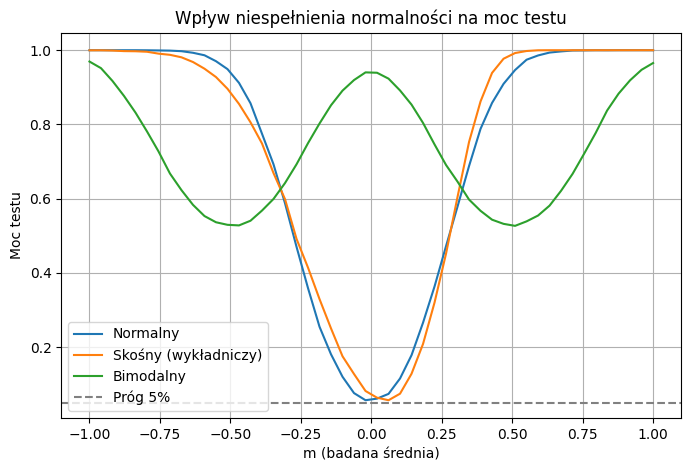

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

# Parametry
alpha = 0.05  # Poziom istotno≈õci
mu_0 = 0  # ≈örednia w hipotezie zerowej
k = 10000  # Liczba iteracji
n = 50  # Wielko≈õƒá pr√≥by
m_values = np.linspace(-1, 1, 50)  # Zakres badanej ≈õredniej

# Definiowanie funkcji pomocniczych do generowania rozk≈Çad√≥w
def normal_samples(mu, sigma, size, k):
    return np.random.normal(mu, sigma, (k, size))

def skewed_samples(mu, size, k):
    return np.random.exponential(scale=1, size=(k, size)) - 1 + mu  # Rozk≈Çad wyk≈Çadniczy przesuniƒôty

def bimodal_samples(mu, sigma, size, k):
    samples1 = np.random.normal(mu - 0.5, sigma, (k // 2, size))
    samples2 = np.random.normal(mu + 0.5, sigma, (k // 2, size))
    return np.vstack((samples1, samples2))

# Testowanie r√≥≈ºnych rozk≈Çad√≥w
distributions = {
    "Normalny": lambda mu: normal_samples(mu, 1, n, k),
    "Sko≈õny (wyk≈Çadniczy)": lambda mu: skewed_samples(mu, n, k),
    "Bimodalny": lambda mu: bimodal_samples(mu, 1, n, k)
}

# Wykres
plt.figure(figsize=(8, 5))

for label, sample_func in distributions.items():
    power = []
    z_critical = norm.ppf(1 - alpha / 2)  # Krytyczna warto≈õƒá Z
    
    for mu in m_values:
        samples = sample_func(mu)  # Macierz k √ó n
        sample_means = np.mean(samples, axis=1)  # ≈örednie z ka≈ºdej pr√≥bki
        
        # Obliczanie odchylenia empirycznego zamiast sta≈Çego
        sample_std = np.std(samples, axis=1, ddof=1)
        se = sample_std / np.sqrt(n)  # B≈ÇƒÖd standardowy
        
        z_scores = (sample_means - mu_0) / se  # Statystyka testowa
        rejections = (np.abs(z_scores) > z_critical)  # Odrzucenie H0
        power.append(np.mean(rejections))
    
    # Rysowanie wykresu dla ka≈ºdego rozk≈Çadu
    plt.plot(m_values, power, label=label)

plt.axhline(y=alpha, color="gray", linestyle="--", label="Pr√≥g 5%")
plt.xlabel("m (badana ≈õrednia)")
plt.ylabel("Moc testu")
plt.title("Wp≈Çyw niespe≈Çnienia normalno≈õci na moc testu")
plt.legend()
plt.grid()
plt.show()


2. Por√≥wnaj wyniki testu dla pr√≥bek pobranych z r√≥≈ºnych rozk≈Çad√≥w (np. normalnego, sko≈õnego, bimodalnego).

**Interpretacja wynik√≥w wykresu**

`Rozk≈Çad normalny`
Moc testu ro≈õnie symetrycznie wraz ze wzrostem warto≈õci ‚à£ùëö‚à£. Warto≈õci mocy sƒÖ najwy≈ºsze dla danej wielko≈õci pr√≥by ùëõ.

`Rozk≈Çad sko≈õny (wyk≈Çadniczy)`
Poniewa≈º rozk≈Çad jest asymetryczny, test mo≈ºe czƒô≈õciej pope≈Çniaƒá b≈Çƒôdy w jednƒÖ stronƒô. Moc testu mo≈ºe byƒá ni≈ºsza ni≈º dla normalnego rozk≈Çadu przy tej samej warto≈õci ùëö, zw≈Çaszcza dla warto≈õci bliskich zeru.
Dla ujemnych ùëö, moc testu mo≈ºe byƒá znacznie mniejsza ni≈º dla dodatnich warto≈õci.

`Rozk≈Çad bimodalny`
Test ma wiƒôksze trudno≈õci z wykrywaniem r√≥≈ºnic, a moc testu mo≈ºe byƒá ni≈ºsza ni≈º dla rozk≈Çadu normalnego. Czasami ro≈õnie wolniej, bo wiƒôksza zmienno≈õƒá utrudnia ocenƒô ≈õredniej. Mo≈ºna te≈º odrazu zauwa≈ºyƒá i≈º mamy dwa ekstrema minimum.

# Wizualizacja zale≈ºno≈õci

1. Przedstaw wp≈Çyw r√≥≈ºnych czynnik√≥w na moc testu na jednym wykresie lub zestawie wykres√≥w.
2.  Uwzglƒôdnij co najmniej trzy spo≈õr√≥d nastƒôpujƒÖcych czynnik√≥w:
	- poziom istotno≈õci (Œ±)
	- liczebno≈õƒá pr√≥by (n)
	- wielko≈õƒá efektu (Œî)
	- rodzaj rozk≈Çadu populacji
3. Zaproponuj spos√≥b oznaczenia r√≥≈ºnych warto≈õci poszczeg√≥lnych czynnik√≥w (np. kolory, style linii, osie).


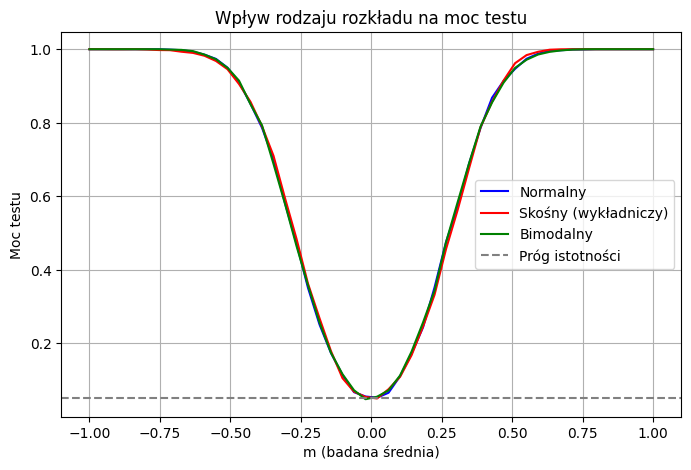

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parametry
alpha_values = [0.01, 0.05, 0.1]  # Poziomy istotno≈õci
sigma = 1  # Odchylenie standardowe
mu_0 = 0  # ≈örednia w hipotezie zerowej
k = 5000  # Liczba iteracji Monte Carlo (mniejsza dla szybszego dzia≈Çania)
n = 50  # Sta≈Ça liczebno≈õƒá pr√≥by
m_values = np.linspace(-1, 1, 50)  # Zakres badanej ≈õredniej

# Definiowanie funkcji generujƒÖcych pr√≥bki
def normal_samples(mu, size):
    return np.random.normal(mu, sigma, size)

def skewed_samples(mu, size):
    return np.random.exponential(scale=1, size=size) - 1 + mu  # Sko≈õny (wyk≈Çadniczy)

def bimodal_samples(mu, size):
    samples1 = np.random.normal(mu - 0.5, sigma, size // 2)
    samples2 = np.random.normal(mu + 0.5, sigma, size // 2)
    return np.concatenate([samples1, samples2])

# Lista rozk≈Çad√≥w
distributions = {
    "Normalny": normal_samples,
    "Sko≈õny (wyk≈Çadniczy)": skewed_samples,
    "Bimodalny": bimodal_samples
}

# Kolory dla r√≥≈ºnych rozk≈Çad√≥w
colors = {"Normalny": "blue", "Sko≈õny (wyk≈Çadniczy)": "red", "Bimodalny": "green"}

plt.figure(figsize=(8, 5))
z_critical = norm.ppf(1 - 0.05 / 2)  # Krytyczna warto≈õƒá Z dla alpha = 0.05

for label, sample_func in distributions.items():
    power = []
    for mu in m_values:
        samples = np.array([sample_func(mu, n) for _ in range(k)])  # Generowanie pr√≥bek
        sample_means = np.mean(samples, axis=1)
        
        z_scores = (sample_means - mu_0) / (sigma / np.sqrt(n))  # Statystyka testowa
        rejections = (np.abs(z_scores) > z_critical)  # Odrzucenie H0
        power.append(np.mean(rejections))
    
    plt.plot(m_values, power, label=label, color=colors[label])

plt.axhline(y=0.05, color="gray", linestyle="--", label="Pr√≥g istotno≈õci")
plt.xlabel("m (badana ≈õrednia)")
plt.ylabel("Moc testu")
plt.title("Wp≈Çyw rodzaju rozk≈Çadu na moc testu")
plt.legend()
plt.grid()
plt.show()
